In [1]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\ZAK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
#sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# for scaling the data
from sklearn.preprocessing import scale
# for evaluating the model
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import confusion_matrix,classification_report
# techniques used to handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **importing the dataset**

In [19]:
df=pd.read_csv("train.csv", index_col=0)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [20]:
df_test=pd.read_csv("test.csv", index_col=0)
df_test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2915         160       RM         21.0     1936   Pave   NaN      Reg   
2916         160       RM         21.0     1894   Pave   NaN      Reg   
2917          20       RL        160.0    20000   Pave   NaN      Reg   
2918          85       RL         62.0    10441   Pave   NaN      Reg   
2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465         HLS    AllPub    Inside  ...         144        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2915         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2916         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2917         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2918         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
2919         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  
1462        Gar2   12500       6    2010        WD         Normal  
1463         NaN       0       3    2010        WD         Normal  
1464         NaN       0       6    2010        WD         Normal  
1465         NaN       0       1    2010        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2915         NaN       0       6    2006        WD         Normal  
2916         NaN       0       4    2006        WD        Abnorml  
2917         NaN       0       9    2006        WD        Abnorml  
2918        Shed     700       7    2006        WD         Normal  
2919         NaN       0      11    2006        WD         Normal  

[1459 rows x 79 columns]

#### **checking null values**

In [21]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### **These features have been dropped due to high number of null values**

In [22]:
df.drop("Alley",axis=1,inplace=True)
df.drop("PoolQC",axis=1,inplace=True)
df.drop("Fence",axis=1,inplace=True)
df.drop("MiscFeature",axis=1,inplace=True)

df_test.drop("Alley",axis=1,inplace=True)
df_test.drop("PoolQC",axis=1,inplace=True)
df_test.drop("Fence",axis=1,inplace=True)
df_test.drop("MiscFeature",axis=1,inplace=True)

In [23]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                  ...                                       
1       AllPub    Inside       Gtl  ...             0         0           0   
2       AllPub       FR2       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub    Corner       Gtl  ...           272         0           0   
5       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...             0         0           0   
1459    AllPub    Inside       Gtl  ...           112         0           0   
1460    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                        
1           0       0       2    2008        WD         Normal    208500  
2           0       0       5    2007        WD         Normal    181500  
3           0       0       9    2008        WD         Normal    223500  
4           0       0       2    2006        WD        Abnorml    140000  
5           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1456        0       0       8    2007        WD         Normal    175000  
1457        0       0       2    2010        WD         Normal    210000  
1458        0    2500       5    2010        WD         Normal    266500  
1459        0       0       4    2010        WD         Normal    142125  
1460        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

#### **features EDA**

In [24]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [26]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

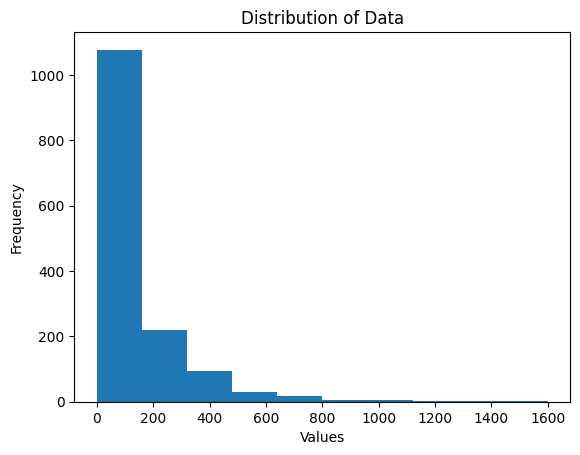

In [27]:
import matplotlib.pyplot as plt

data = df['MasVnrArea']

# Create a histogram plot
plt.hist(data, bins=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Data')

# Show the plot
plt.show()


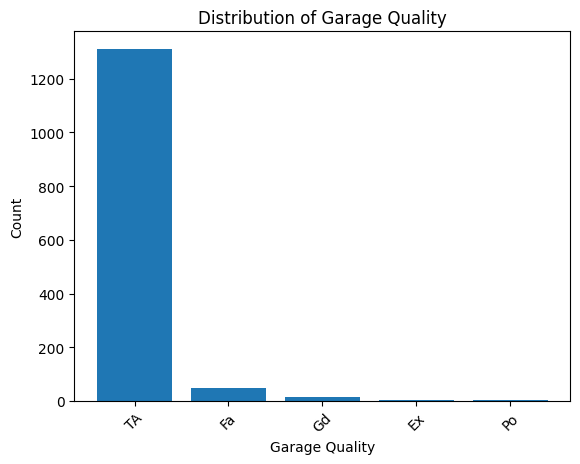

In [28]:
# Count the occurrences of each category
garage_qual_counts = df['GarageQual'].value_counts()

# Create the bar plot
plt.bar(garage_qual_counts.index, garage_qual_counts.values)

# Set the labels and title
plt.xlabel('Garage Quality')
plt.ylabel('Count')
plt.title('Distribution of Garage Quality')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


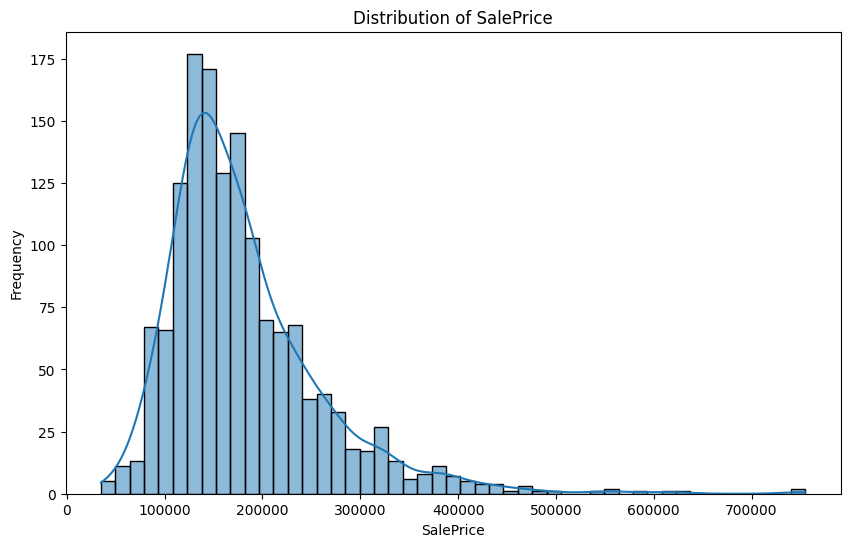

In [29]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### **Visualize the relationship between numerical features and the target variable 'SalePrice'**

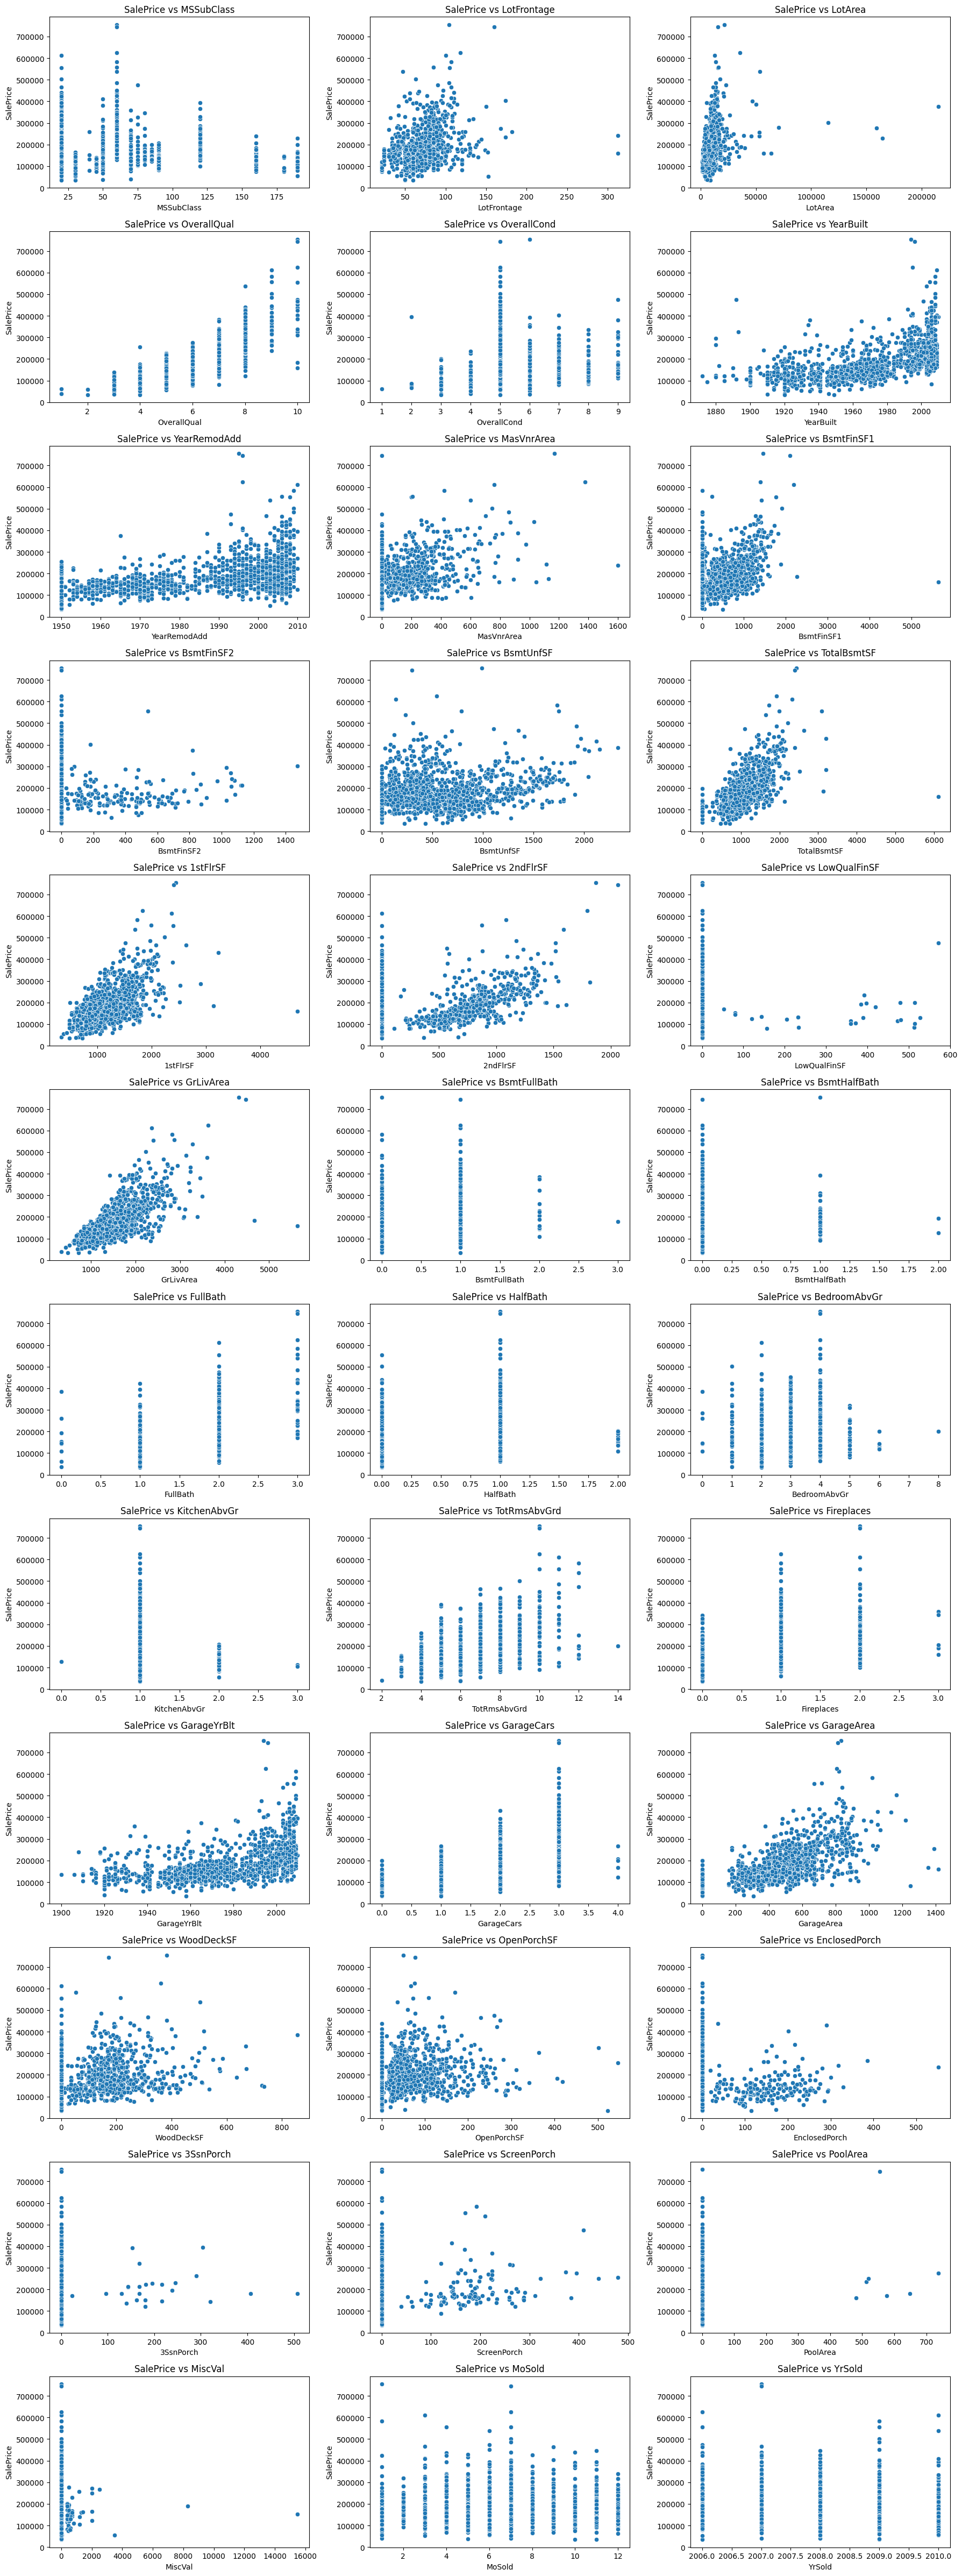

In [30]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns=['SalePrice'])
num_plots = len(numerical_features.columns)
ncols = 3
nrows = num_plots // ncols + (num_plots % ncols > 0)

plt.figure(figsize=(18, nrows * 4))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(nrows, ncols, i + 1)
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

#### **Visualize the relationship between categorical features and the target variable 'SalePrice'**


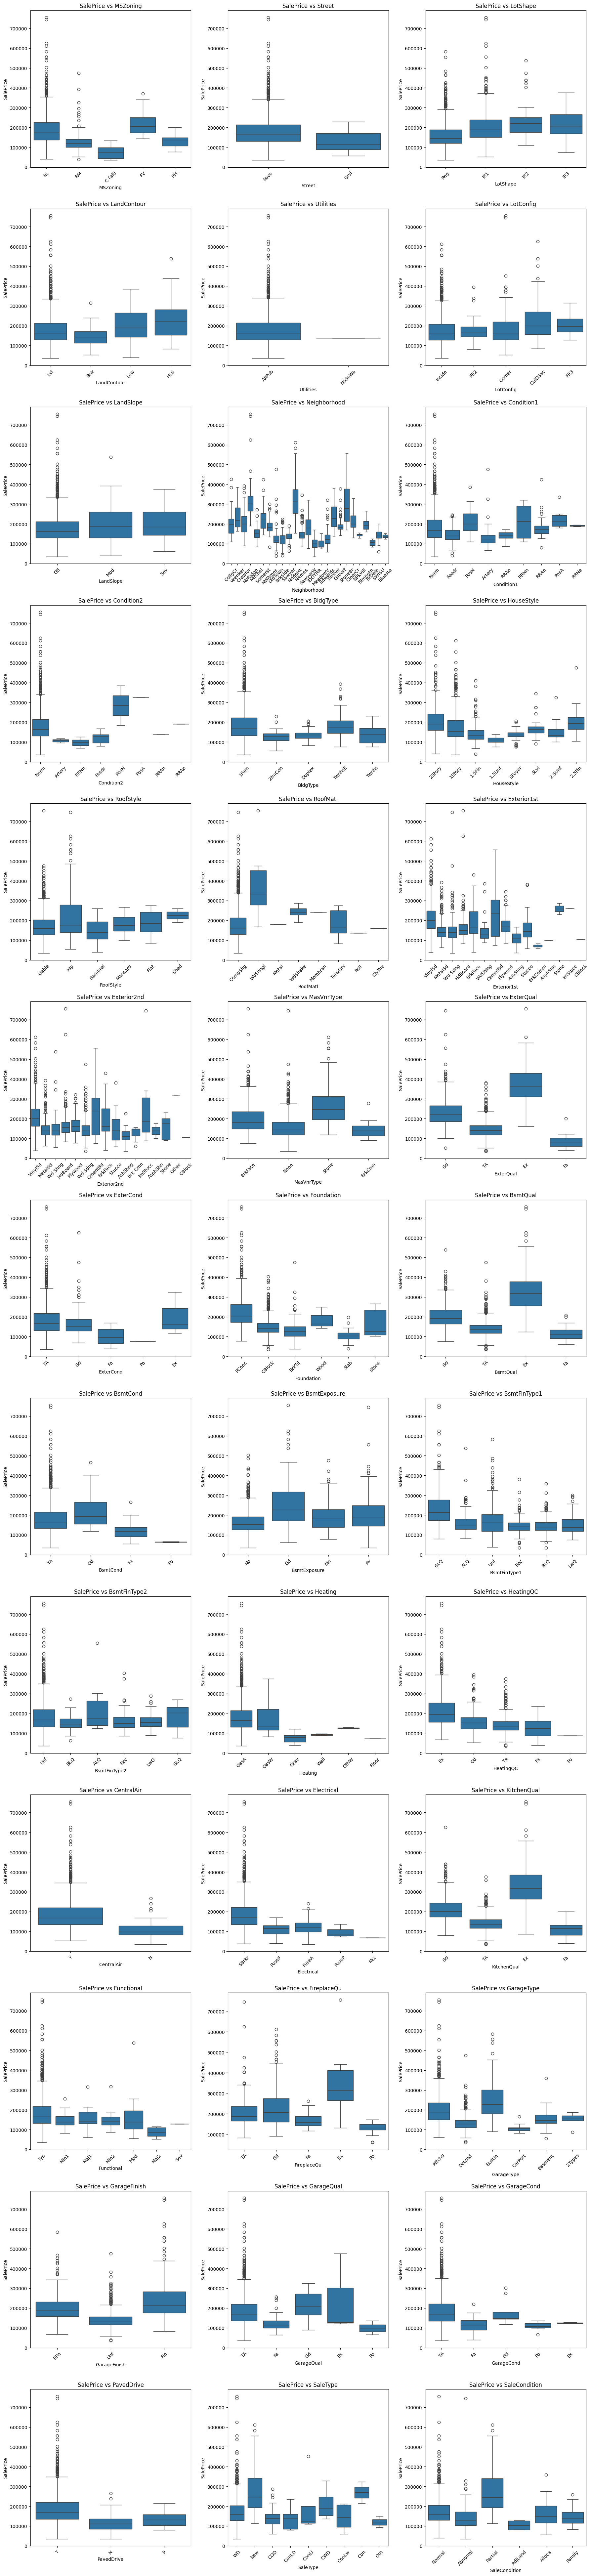

In [31]:
categorical_features = df.select_dtypes(include=[object])
cat_plots = len(categorical_features.columns)
ncols = 3
nrows = cat_plots // ncols + (cat_plots % ncols > 0)

plt.figure(figsize=(18, nrows * 6))
for i, col in enumerate(categorical_features.columns):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Distribution of numerical features**

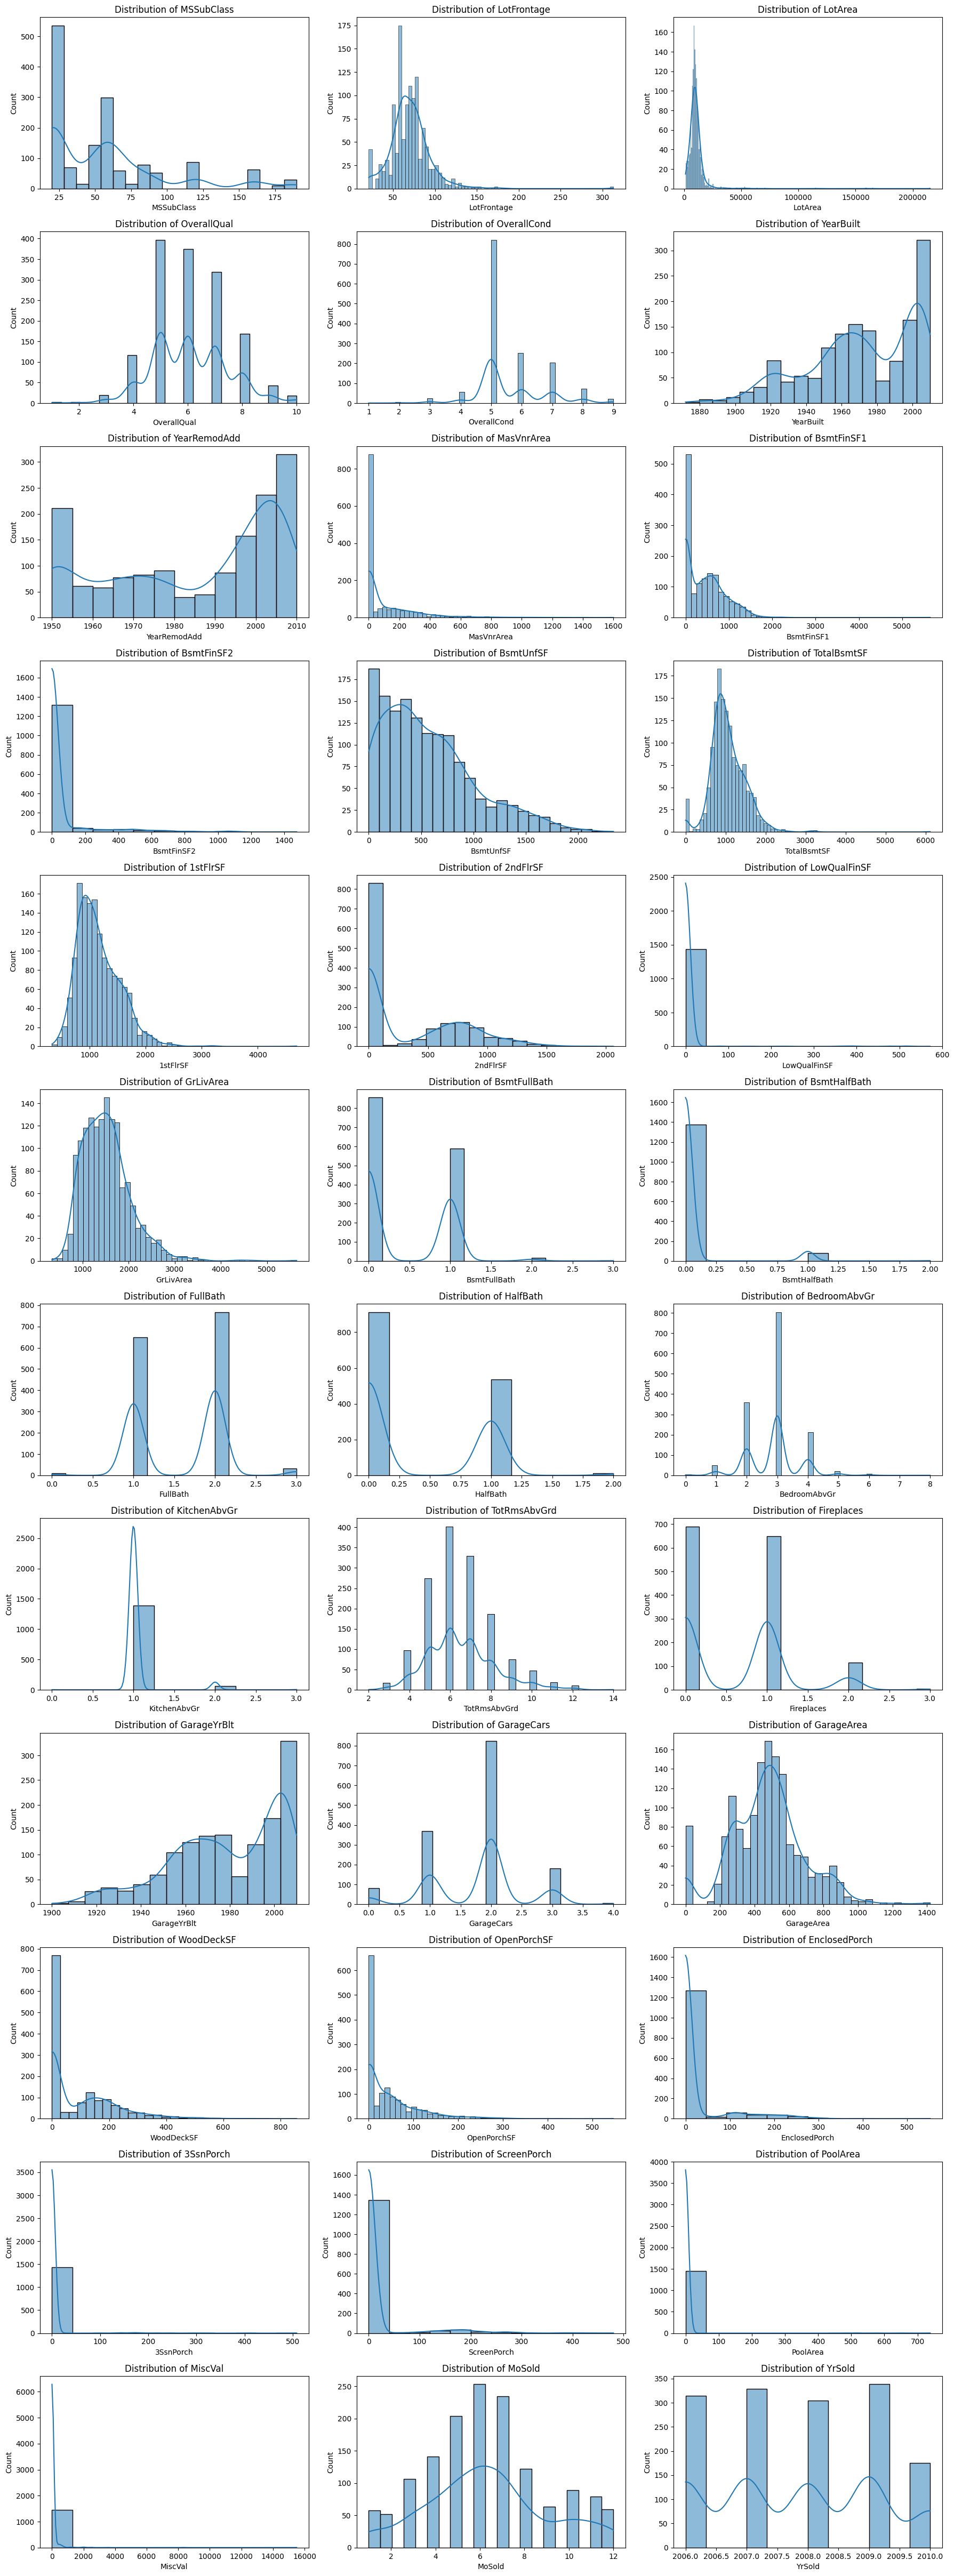

In [32]:
plt.figure(figsize=(18, nrows * 4))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### **Count plots of categorical features**


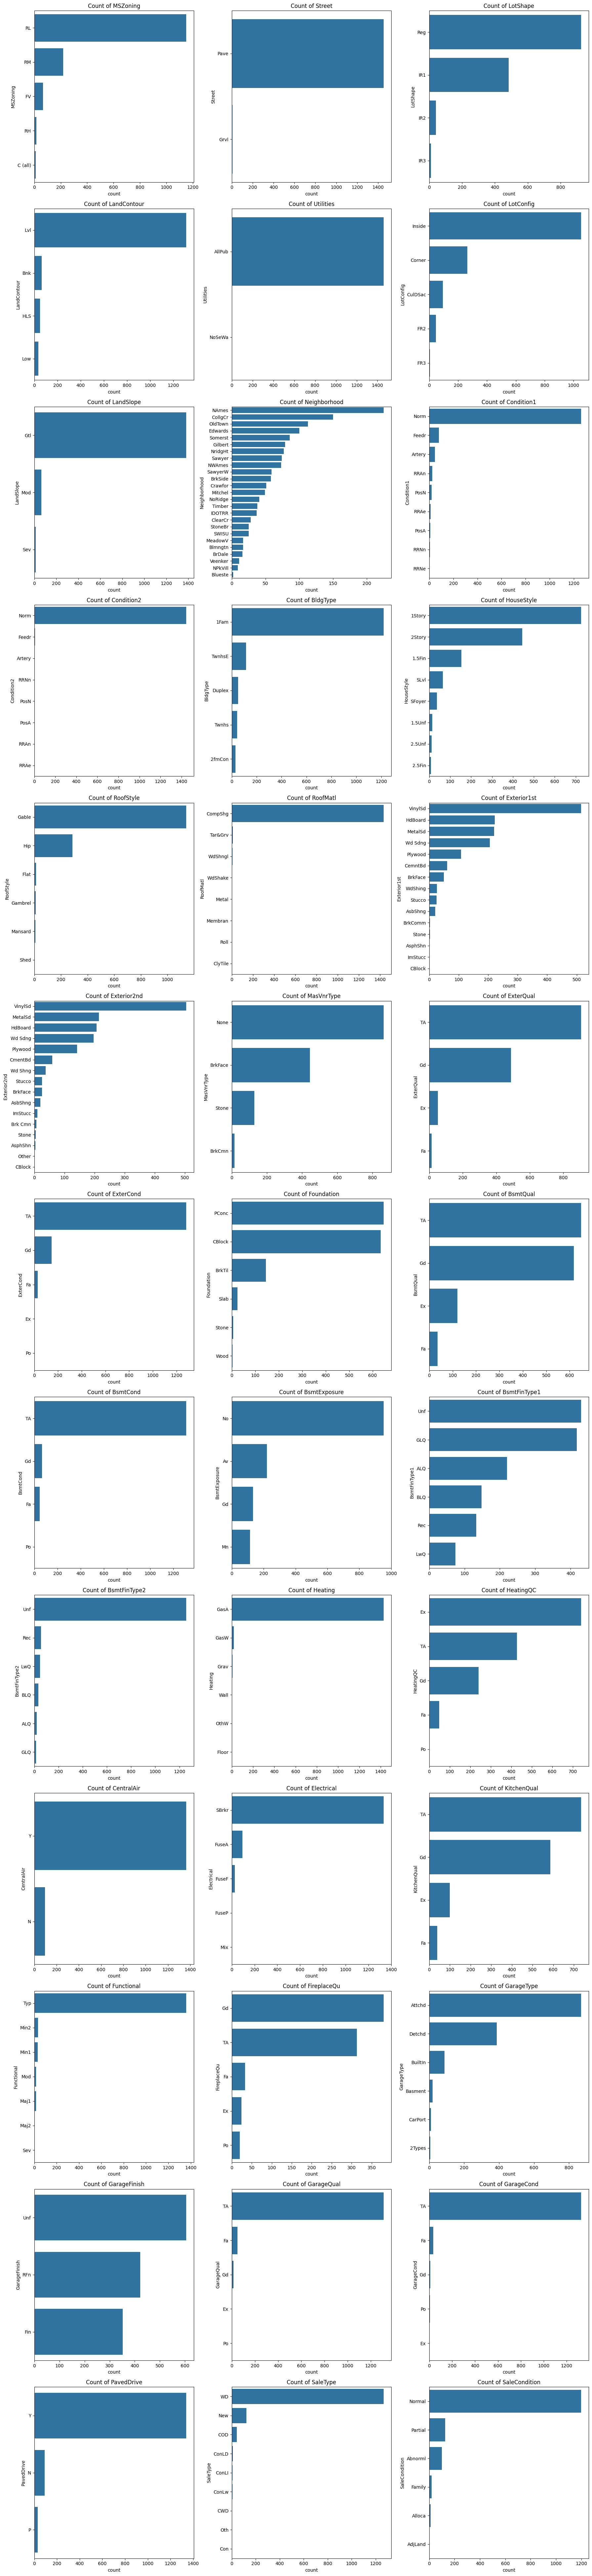

In [33]:
plt.figure(figsize=(18, nrows * 6))
for i, col in enumerate(categorical_features.columns):
    plt.subplot(nrows, ncols, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

#### **Impute the "LotFrontage" feature with the median of the same neighborhood**


In [34]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### **Impute basement related features with 'NA'**

In [35]:
bsmt_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_features] = df[bsmt_features].fillna('NA')

#### **Impute MasVnrType with the mode and MasVnrArea with 0 where MasVnrType is None, otherwise with the median**


In [36]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [37]:
df_copy = df.copy()

In [38]:
df_copy.dropna(inplace=True)


#### **Impute garage related features with 'NA' and median year for GarageYrBlt**


In [39]:
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_features] = df[garage_features].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

#### **Impute fireplaceQu wiht the model**

In [40]:
df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0], inplace=True)

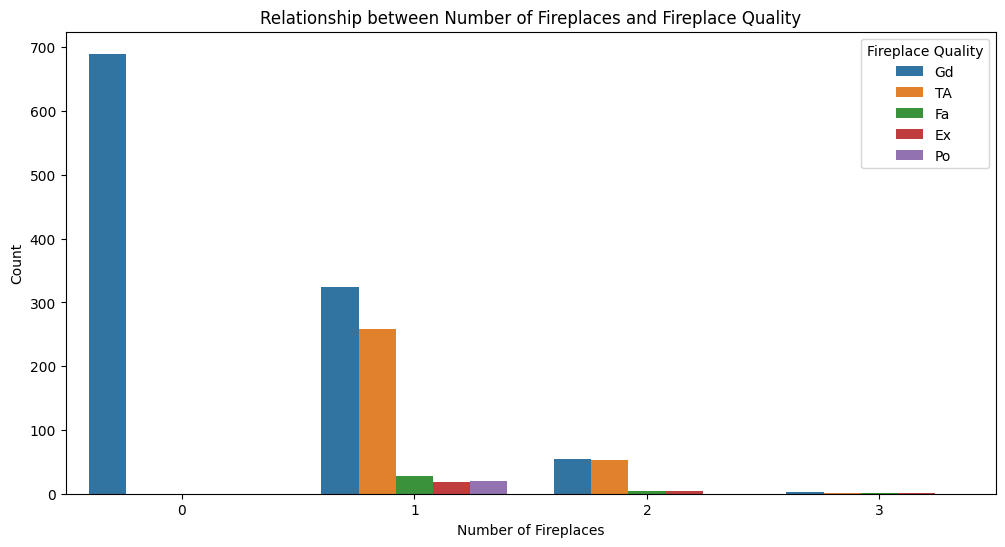

In [41]:
# Visualize the relationship using a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Fireplaces', hue='FireplaceQu', data=df)
plt.title('Relationship between Number of Fireplaces and Fireplace Quality')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Count')
plt.legend(title='Fireplace Quality')
plt.show()

#### **then i dropped the rest null values**

In [42]:
df.dropna(inplace=True)

In [43]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                  ...                                       
1       AllPub    Inside       Gtl  ...             0         0           0   
2       AllPub       FR2       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub    Corner       Gtl  ...           272         0           0   
5       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...             0         0           0   
1459    AllPub    Inside       Gtl  ...           112         0           0   
1460    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                        
1           0       0       2    2008        WD         Normal    208500  
2           0       0       5    2007        WD         Normal    181500  
3           0       0       9    2008        WD         Normal    223500  
4           0       0       2    2006        WD        Abnorml    140000  
5           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1456        0       0       8    2007        WD         Normal    175000  
1457        0       0       2    2010        WD         Normal    210000  
1458        0    2500       5    2010        WD         Normal    266500  
1459        0       0       4    2010        WD         Normal    142125  
1460        0       0       6    2008        WD         Normal    147500  

[1459 rows x 76 columns]

In [44]:
categorical_features = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)

print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [45]:
df_copy2 = df.copy()

#### **label encoded the catigorical features in the dataset for training comparing**

In [73]:
le = preprocessing.LabelEncoder()

cat=df_copy2.select_dtypes("object").columns
print(cat)

cat=cat
for x in cat:
  df_copy2[x]=le.fit_transform(df_copy2[x])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Get the categorical columns
cat_cols = df_copy2.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    df_copy2[col] = le.fit_transform(df_copy2[col])
    
    # Create a mapping of the fitted classes to integer values
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    
    # Apply the mapping to the test data
    df_test[col] = df_test[col].map(le_dict)
    
    # Handle unseen labels (if any)
    df_test[col] = df_test[col].fillna(-1).astype(int)

#### **checked how features are correlated to each other and to the target**

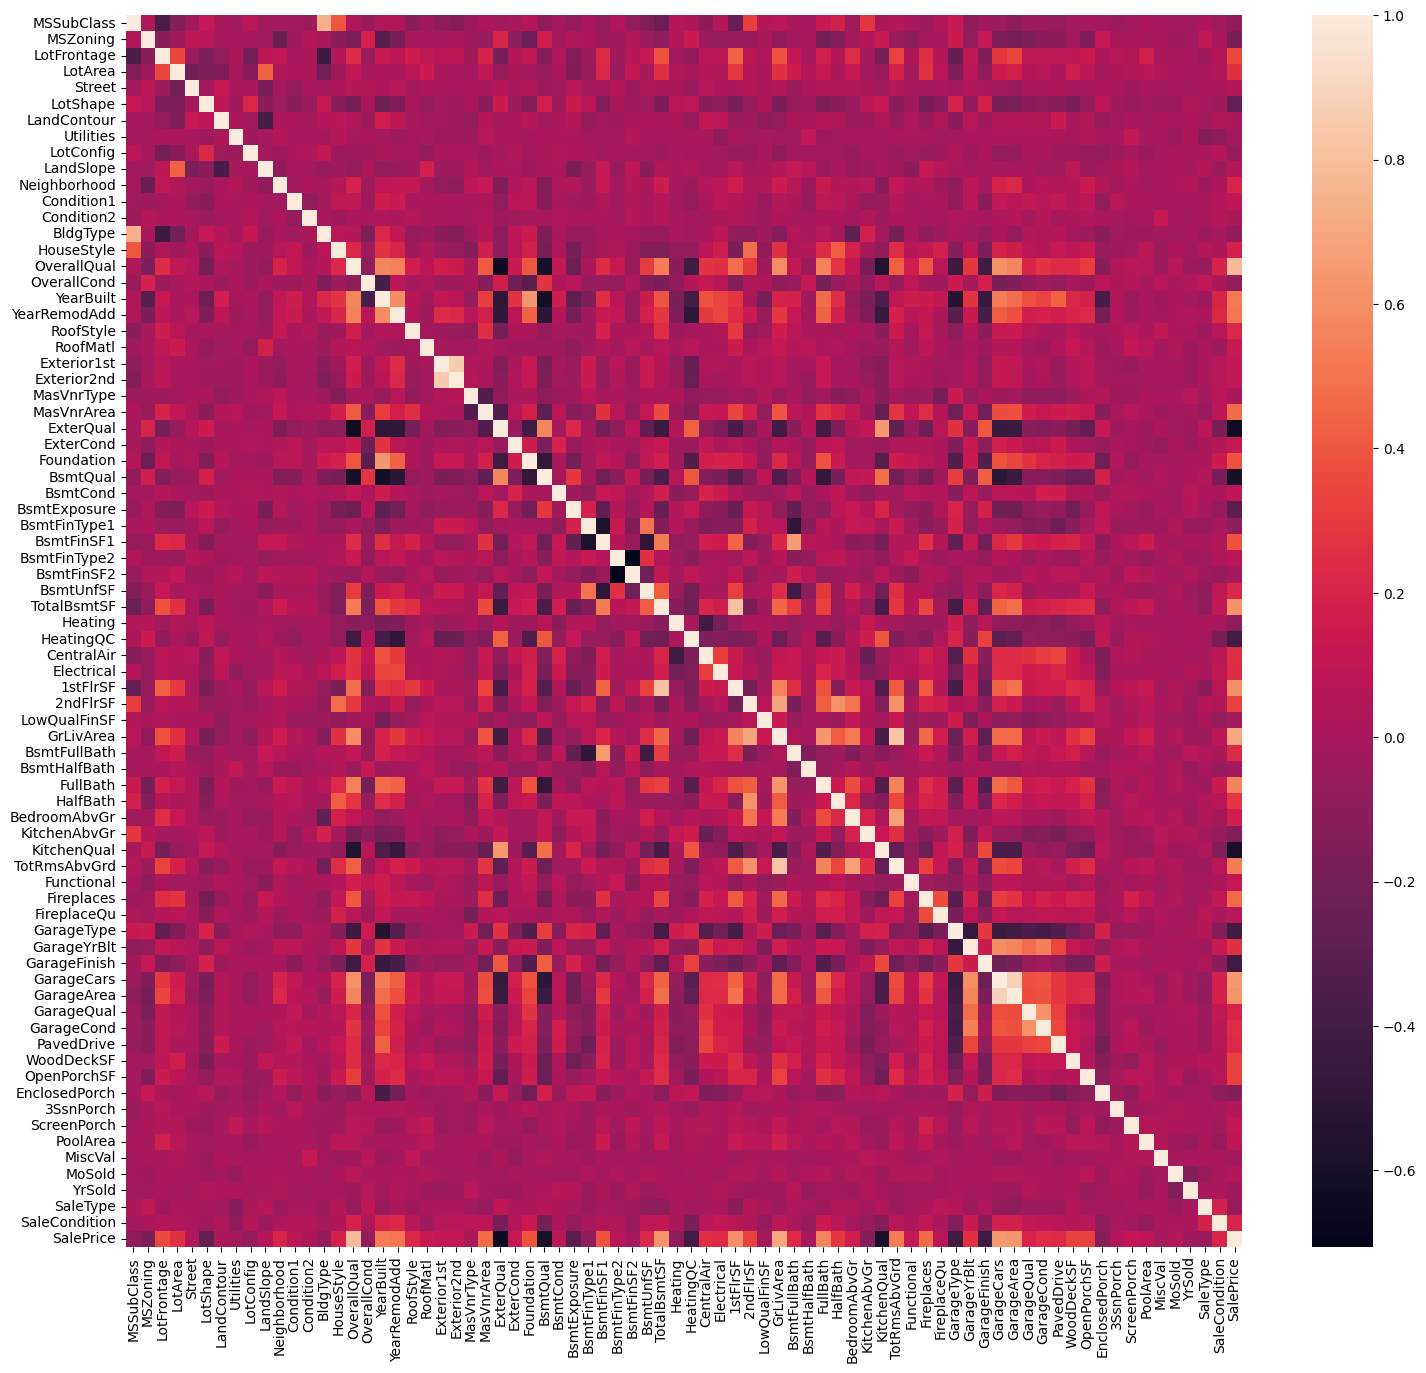

In [48]:
import matplotlib.pyplot as plt

High_pr_corr = df_copy2.corr()

# Set the figure size - width, height
plt.figure(figsize=(18, 16))

sns.heatmap(data=High_pr_corr)
plt.show()

#### **filtered the features that was highly correlated with the target for proper and effiecent training**

In [69]:
correlation_matrix = df_copy2.corr()

threshold = 0.6
correlation_with_saleprice = correlation_matrix['SalePrice'].abs()
most_correlated_features = correlation_with_saleprice[correlation_with_saleprice > threshold].index

# Create a DataFrame with the selected features
df_cor = df_copy2[most_correlated_features]

# Sort the features by their correlation with SalePrice
sorted_features = correlation_with_saleprice[most_correlated_features].sort_values(ascending=False)

df_cor

OverallQual  ExterQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  \
Id                                                                           
1               7          2          856       856       1710           2   
2               6          3         1262      1262       1262           2   
3               7          2          920       920       1786           2   
4               7          3          756       961       1717           3   
5               8          2         1145      1145       2198           3   
...           ...        ...          ...       ...        ...         ...   
1456            6          3          953       953       1647           2   
1457            6          3         1542      2073       2073           2   
1458            7          0         1152      1188       2340           1   
1459            5          3         1078      1078       1078           1   
1460            5          2         1256      1256       1256           1   

      GarageArea  SalePrice  
Id                           
1            548     208500  
2            460     181500  
3            608     223500  
4            642     140000  
5            836     250000  
...          ...        ...  
1456         460     175000  
1457         500     210000  
1458         252     266500  
1459         240     142125  
1460         276     147500  

[1459 rows x 8 columns]

C:\Users\ZAK\AppData\Local\Temp\ipykernel_56208\1185721978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')


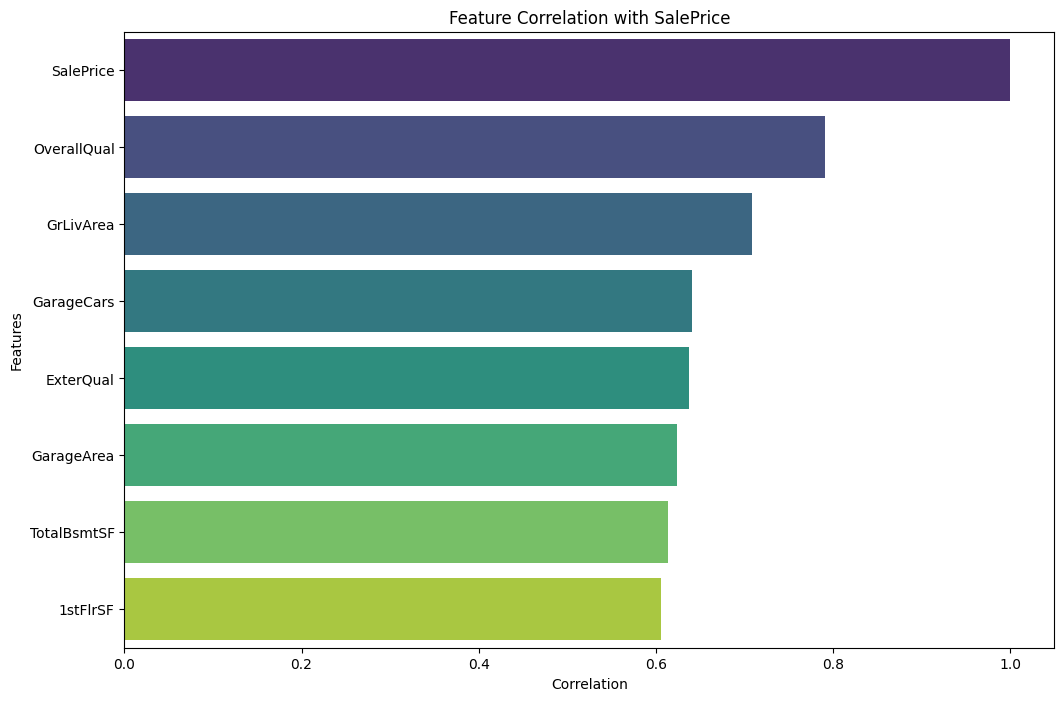

In [70]:
# Plotting the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')
plt.title('Feature Correlation with SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [50]:
df_test = df_test[most_correlated_features.drop('SalePrice')]

In [51]:
df_test

OverallQual  ExterQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  \
Id                                                                           
1461            5          3        882.0       896        896         1.0   
1462            6          3       1329.0      1329       1329         1.0   
1463            5          3        928.0       928       1629         2.0   
1464            6          3        926.0       926       1604         2.0   
1465            8          2       1280.0      1280       1280         2.0   
...           ...        ...          ...       ...        ...         ...   
2915            4          3        546.0       546       1092         0.0   
2916            4          3        546.0       546       1092         1.0   
2917            5          3       1224.0      1224       1224         2.0   
2918            5          3        912.0       970        970         0.0   
2919            7          3        996.0       996       2000         3.0   

      GarageArea  
Id                
1461       730.0  
1462       312.0  
1463       482.0  
1464       470.0  
1465       506.0  
...          ...  
2915         0.0  
2916       286.0  
2917       576.0  
2918         0.0  
2919       650.0  

[1459 rows x 7 columns]

#### **stardarised all data between 0 and 1 in df_cor**

In [52]:
df_col = np.array(df_cor.columns)
df_col = df_col[df_col != 'SalePrice']
df_col

array(['OverallQual', 'ExterQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
df_cor[df_col] = scaler.fit_transform(df_cor[df_col])

df_test[df_col] = scaler.transform(df_test[df_col])

C:\Users\ZAK\AppData\Local\Temp\ipykernel_56208\1960162564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor[df_col] = scaler.fit_transform(df_cor[df_col])
C:\Users\ZAK\AppData\Local\Temp\ipykernel_56208\1960162564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_col] = scaler.transform(df_test[df_col])


In [54]:
df_cor

OverallQual  ExterQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  \
Id                                                                           
1        0.666667   0.666667     0.140098  0.119780   0.259231        0.50   
2        0.555556   1.000000     0.206547  0.212942   0.174830        0.50   
3        0.666667   0.666667     0.150573  0.134465   0.273549        0.50   
4        0.666667   1.000000     0.123732  0.143873   0.260550        0.75   
5        0.777778   0.666667     0.187398  0.186095   0.351168        0.75   
...           ...        ...          ...       ...        ...         ...   
1456     0.555556   1.000000     0.155974  0.142038   0.247362        0.50   
1457     0.555556   1.000000     0.252373  0.399036   0.327619        0.50   
1458     0.666667   0.000000     0.188543  0.195961   0.377920        0.25   
1459     0.444444   1.000000     0.176432  0.170721   0.140166        0.25   
1460     0.444444   0.666667     0.205565  0.211565   0.173700        0.25   

      GarageArea  SalePrice  
Id                           
1       0.386460     208500  
2       0.324401     181500  
3       0.428773     223500  
4       0.452750     140000  
5       0.589563     250000  
...          ...        ...  
1456    0.324401     175000  
1457    0.352609     210000  
1458    0.177715     266500  
1459    0.169252     142125  
1460    0.194640     147500  

[1459 rows x 8 columns]

#### **splitting the dataset into**

In [55]:
from sklearn.model_selection import train_test_split

X = df_cor.drop('SalePrice', axis=1)
y = df_cor['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [56]:
X_train

OverallQual  ExterQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  \
Id                                                                           
907      0.777778   0.666667     0.265630  0.298761   0.245290        0.75   
782      0.555556   0.666667     0.124550  0.109224   0.239073        0.50   
1279     0.777778   0.666667     0.184615  0.182194   0.319706        0.50   
621      0.222222   1.000000     0.141408  0.121615   0.099849        0.00   
669      0.444444   1.000000     0.194435  0.253098   0.207800        0.50   
...           ...        ...          ...       ...        ...         ...   
1096     0.555556   0.666667     0.215057  0.224874   0.184627        0.50   
1131     0.333333   1.000000     0.183633  0.228086   0.310286        0.50   
1295     0.444444   1.000000     0.141408  0.121615   0.099849        0.50   
861      0.666667   0.666667     0.149264  0.132630   0.205727        0.25   
1127     0.666667   0.666667     0.224714  0.280174   0.230030        0.75   

      GarageArea  
Id                
907     0.610014  
782     0.341326  
1279    0.406911  
621     0.000000  
669     0.406206  
...          ...  
1096    0.310296  
1131    0.406206  
1295    0.403385  
861     0.152327  
1127    0.465444  

[1313 rows x 7 columns]

#### **training the decision tree model on the dataset**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


# Create a Decision Tree Regressor object
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae_dt}")
print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"R-squared: {r2_dt}")

Mean Absolute Error: 0.03366552019982004
Mean Squared Error: 0.002342530610669111
Root Mean Squared Error: 0.04839969639025756
R-squared: 0.7824067597546487


In [65]:
# Make predictions on the test set
predictins_dt = regressor.predict(df_test)
predictins_dt

array([117500., 158000., 135000., ..., 142000.,  98950., 219500.])

#### **training the randomforest model on the dataset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Mean Absolute Error: 0.02578036641039868
Mean Squared Error: 0.0013924884382181884
Root Mean Squared Error: 0.037316061397449064
R-squared: 0.8706543812507372


In [67]:
# Make predictions on the test set
predictins_rf = regressor.predict(df_test)
predictins_rf

array([117500., 158000., 135000., ..., 142000.,  98950., 219500.])

#### **plotting each model measurments results and comparing them with each other**

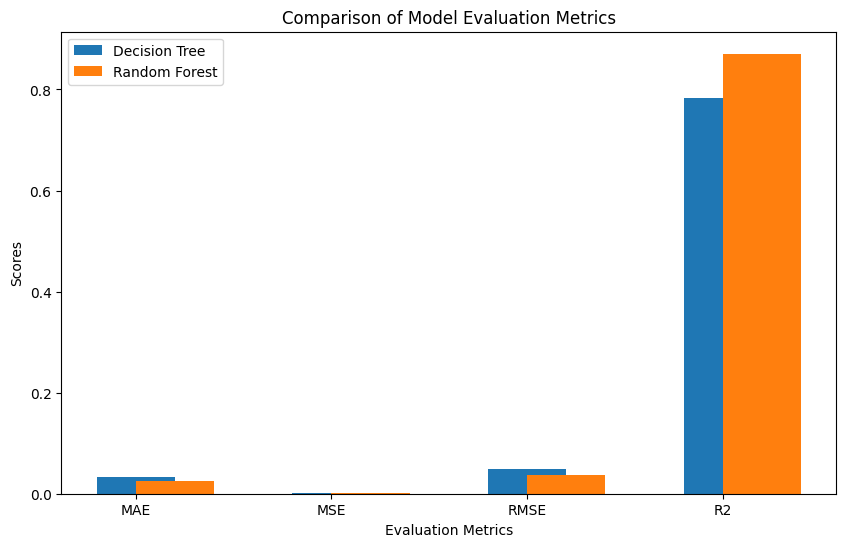

In [ ]:
# Plot the comparison of evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
decision_tree_scores = [mae_dt, mse_dt, rmse_dt, r2_dt]
random_forest_scores = [mae_rf, mse_rf, rmse_rf, r2_rf]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, decision_tree_scores, width=0.4, label='Decision Tree', align='center')
plt.bar(x, random_forest_scores, width=0.4, label='Random Forest', align='edge')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Evaluation Metrics')
plt.xticks(ticks=x, labels=metrics)
plt.legend()
plt.show()

#### **Evaluating the preformance of each model by looking at the learning curve through the training process**

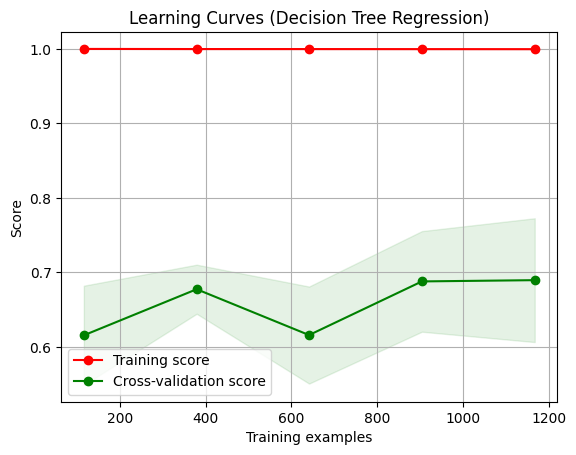

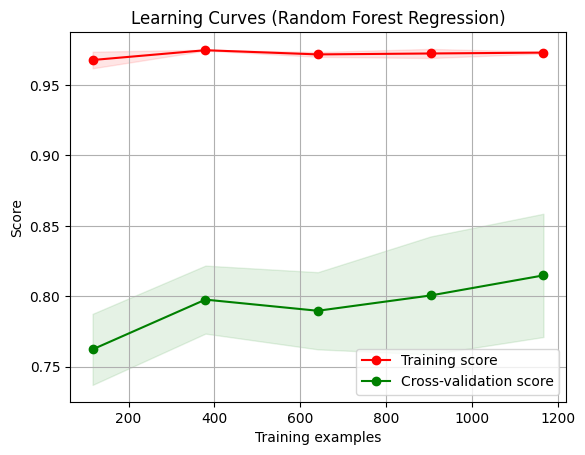

In [126]:
from sklearn.model_selection import learning_curve

# the plot function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = np.array(X), np.array(y)

# Decision Tree Regression
plot_learning_curve(regressor, "Learning Curves (Decision Tree Regression)", X, y, cv=5)

# Random Forest Regression
plot_learning_curve(rf_regressor, "Learning Curves (Random Forest Regression)", X, y, cv=5)

plt.show()